<a href="https://colab.research.google.com/github/steinruck/WANG-690-FALL-2020/blob/master/Session_06/Session_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df_list = pd.read_html("https://www.genealogybranches.com/censuscosts.html")
len(df_list)

2

In [3]:
census_df = df_list[0]
census_df.head()

,0,1,2,3
0,Census Year,Total Population,Census Cost,Average Cost Per Person
1,1790,3929214,"$44,377",1.13 cents
2,1800,5308483,"$66,109",1.24 cents
3,1810,7239881,"$178,445",2.46 cents
4,1820,9633822,"$208,526",2.16 cents


In [4]:
# iloc chooses index position of first row
# is a series. Need to convert to list
list(census_df.iloc[0])

['Census Year', 'Total Population', 'Census Cost', 'Average Cost Per Person']

In [5]:
# assign list of columns as column header
census_df.columns
census_df.columns = list(census_df.iloc[0])
census_df.head()

,Census Year,Total Population,Census Cost,Average Cost Per Person
0,Census Year,Total Population,Census Cost,Average Cost Per Person
1,1790,3929214,"$44,377",1.13 cents
2,1800,5308483,"$66,109",1.24 cents
3,1810,7239881,"$178,445",2.46 cents
4,1820,9633822,"$208,526",2.16 cents


In [6]:
# drop first line
census_df.drop(index=0, axis=0, inplace=True)
census_df.head()

,Census Year,Total Population,Census Cost,Average Cost Per Person
1,1790,3929214,"$44,377",1.13 cents
2,1800,5308483,"$66,109",1.24 cents
3,1810,7239881,"$178,445",2.46 cents
4,1820,9633822,"$208,526",2.16 cents
5,1830,12866020,"$378,545",2.94 cents


In [7]:

def cleanse_cost_avg(raw_avg):

    raw_avg = str(raw_avg)

    if raw_avg.find("cents") != -1:
        new_avg = raw_avg.replace("cents", "")
    elif raw_avg.find("$") != -1:
        new_avg = raw_avg.replace("$", "")
    else:
        new_avg = raw_avg
        
    return new_avg

    

In [8]:
census_df["new avg cost"] = census_df["Average Cost Per Person"].apply(cleanse_cost_avg)
census_df

,Census Year,Total Population,Census Cost,Average Cost Per Person,new avg cost
1,1790,3929214,"$44,377",1.13 cents,1.13
2,1800,5308483,"$66,109",1.24 cents,1.24
3,1810,7239881,"$178,445",2.46 cents,2.46
4,1820,9633822,"$208,526",2.16 cents,2.16
5,1830,12866020,"$378,545",2.94 cents,2.94
6,1840,17069458,"$833,371",4.88 cents,4.88
7,1850,23191876,"$1,423,351",6.14 cents,6.14
8,1860,31443321,"$1,969,377",6.26 cents,6.26
9,1870,38558371,"$3,421,198",8.87 cents,8.87
10,1880,50155783,"$5,790,678",11.54 cents,11.54


In [9]:
# change number in specific row and column
#census_df.at[12, 'Average Cost Per Person'] = '20.25'
#census_df

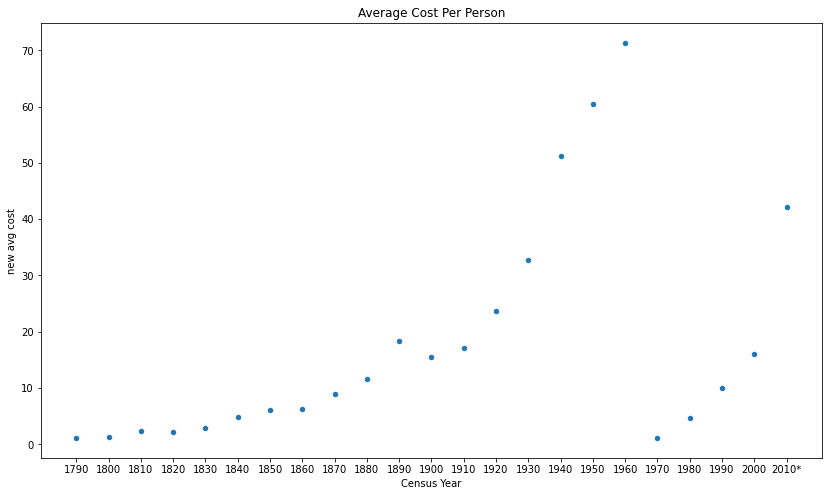

In [10]:
# pandas version of graph
census_df["new avg cost"] = census_df["new avg cost"].astype(float)
census_df.plot.scatter("Census Year", "new avg cost", figsize=(14,8), title="Average Cost Per Person")

In [11]:
import matplotlib.pyplot as plt

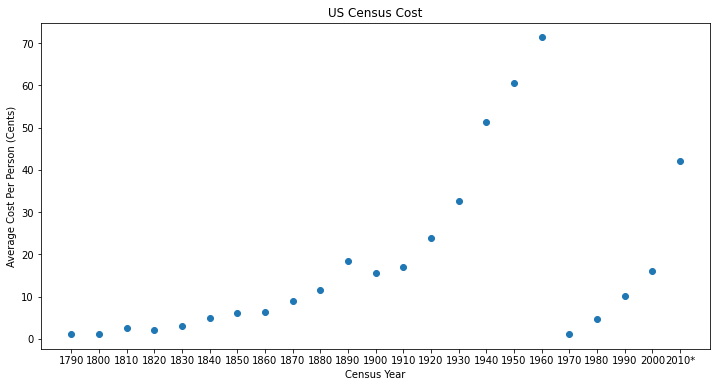

In [12]:
fig, ax = plt.subplots(figsize=(12,6)) # 12 maxes it bigger

ax.scatter(census_df["Census Year"], census_df["new avg cost"].astype(float))
ax.set_title("US Census Cost")
ax.set_xlabel("Census Year")
ax.set_ylabel("Average Cost Per Person (Cents)")
fig.show()

# as is the cents are not converted to dollars and they are all strings not numbers. Needed to convert to float
# still have not converted to dollars

In [13]:
cleanse_cost_avg("1.23 cents")

'1.23 '